In [4]:
import os
import timeit
import cv2
import face_recognition as fr
import pickle
import numpy as np
from skimage import io as io
from tqdm import tqdm
from sklearn import datasets, svm, metrics
from matplotlib import pyplot as plt
import random
%matplotlib inline

In [5]:
with open('gender_data.pkl', 'rb') as f:
    gender_dataset_raw = pickle.load(f)

random.shuffle(gender_dataset_raw)

In [6]:
embedding_list_train = list()
gender_label_list_train = list()

embedding_list_test = list()
gender_label_list_test = list()

for emb, label in gender_dataset_raw[:248]:
    embedding_list_train.append(emb)
    gender_label_list_train.append(label)

for emb, label in gender_dataset_raw[:248]:
    embedding_list_test.append(emb)
    gender_label_list_test.append(label)
    
print('length of embedding train list: {}'.format(len(embedding_list_train)))
print('length of label train list: {}'.format(len(gender_label_list_train)))
print('length of embedding test list: {}'.format(len(embedding_list_test)))
print('length of label test list: {}'.format(len(gender_label_list_test)))

length of embedding train list: 248
length of label train list: 248
length of embedding test list: 248
length of label test list: 248


In [7]:
classifier = svm.SVC(gamma='auto', kernel='rbf', C=20)
classifier.fit(embedding_list_train, gender_label_list_train)

expected = gender_label_list_test
predicted = classifier.predict(embedding_list_test)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           F       0.98      0.99      0.98       129
           M       0.99      0.97      0.98       119

   micro avg       0.98      0.98      0.98       248
   macro avg       0.98      0.98      0.98       248
weighted avg       0.98      0.98      0.98       248


Confusion matrix:
[[128   1]
 [  3 116]]


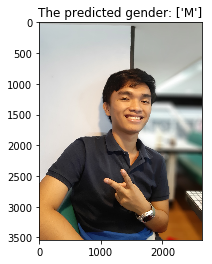

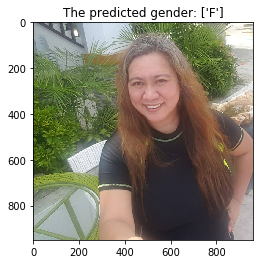

In [9]:
img1 = io.imread('ken.jpg')
img2 = io.imread('alon.jpg')

img1_enc = fr.face_encodings(img1)[0]
img2_enc = fr.face_encodings(img2)[0]

img1_predict = classifier.predict([img1_enc])
img2_predict = classifier.predict([img2_enc])

plt.title('The predicted gender: {}'.format(img1_predict))
plt.imshow(img1)
plt.show()

plt.title('The predicted gender: {}'.format(img2_predict))
plt.imshow(img2)
plt.show()